<h2>About this Project</h2>
<p>In this project you will implement k-NN to classify images of faces. You will use the NumPy library to implement functions that will find nearest neighbors, calculate absolute loss, perform k-NN classification on a data set, and calculate the accuracy of your classifier.</p>


<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong></p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.</p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
  <li><strong>Save your notebook.</strong></li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
</ol>

<h2>Import Libraries</h2>

<p>Before you get started, you need to import a few libraries. You can do this by executing the following code. Remember, run code in a cell by selecting the cell, holding the shift key, and pressing enter/return.</p>

In [3]:
import numpy as np
from scipy.stats import mode
import sys
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time
sys.path.append('/home/codio/workspace/.guides/hf')
from helper import *

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.5


<h2>k-Nearest Neighbors Implementation in Python</h2>

<p>The goal of implementing your $k$-NN classifier is to build a classifier for face recognition. We have obtained some data, images of faces, for testing your code. The data resides in the file <code>faces.mat</code>, which holds the dataset for our exercises below.</p>

<p>We will refer to the training vectors as <b>xTr</b> with labels <b>yTr</b>. Our testing vectors are <b>xTe</b> with labels <b>yTe</b>.
As a reminder, to predict the label or class of an image in <b>xTe</b>, we will look for the <i>k</i>-nearest neighbors in <b>xTr</b> and predict a label based on their labels in <b>yTr</b>. For evaluation, we will compare these labels against the true labels provided in <b>yTe</b>.</p>

<h3> Visualizing the Data</h3>

<p>Let us take a look at the data. The following script will take the first ten training images from the face dataset and visualize them. Run the code cell to see the visualized data.</p>

<IPython.core.display.Javascript object>


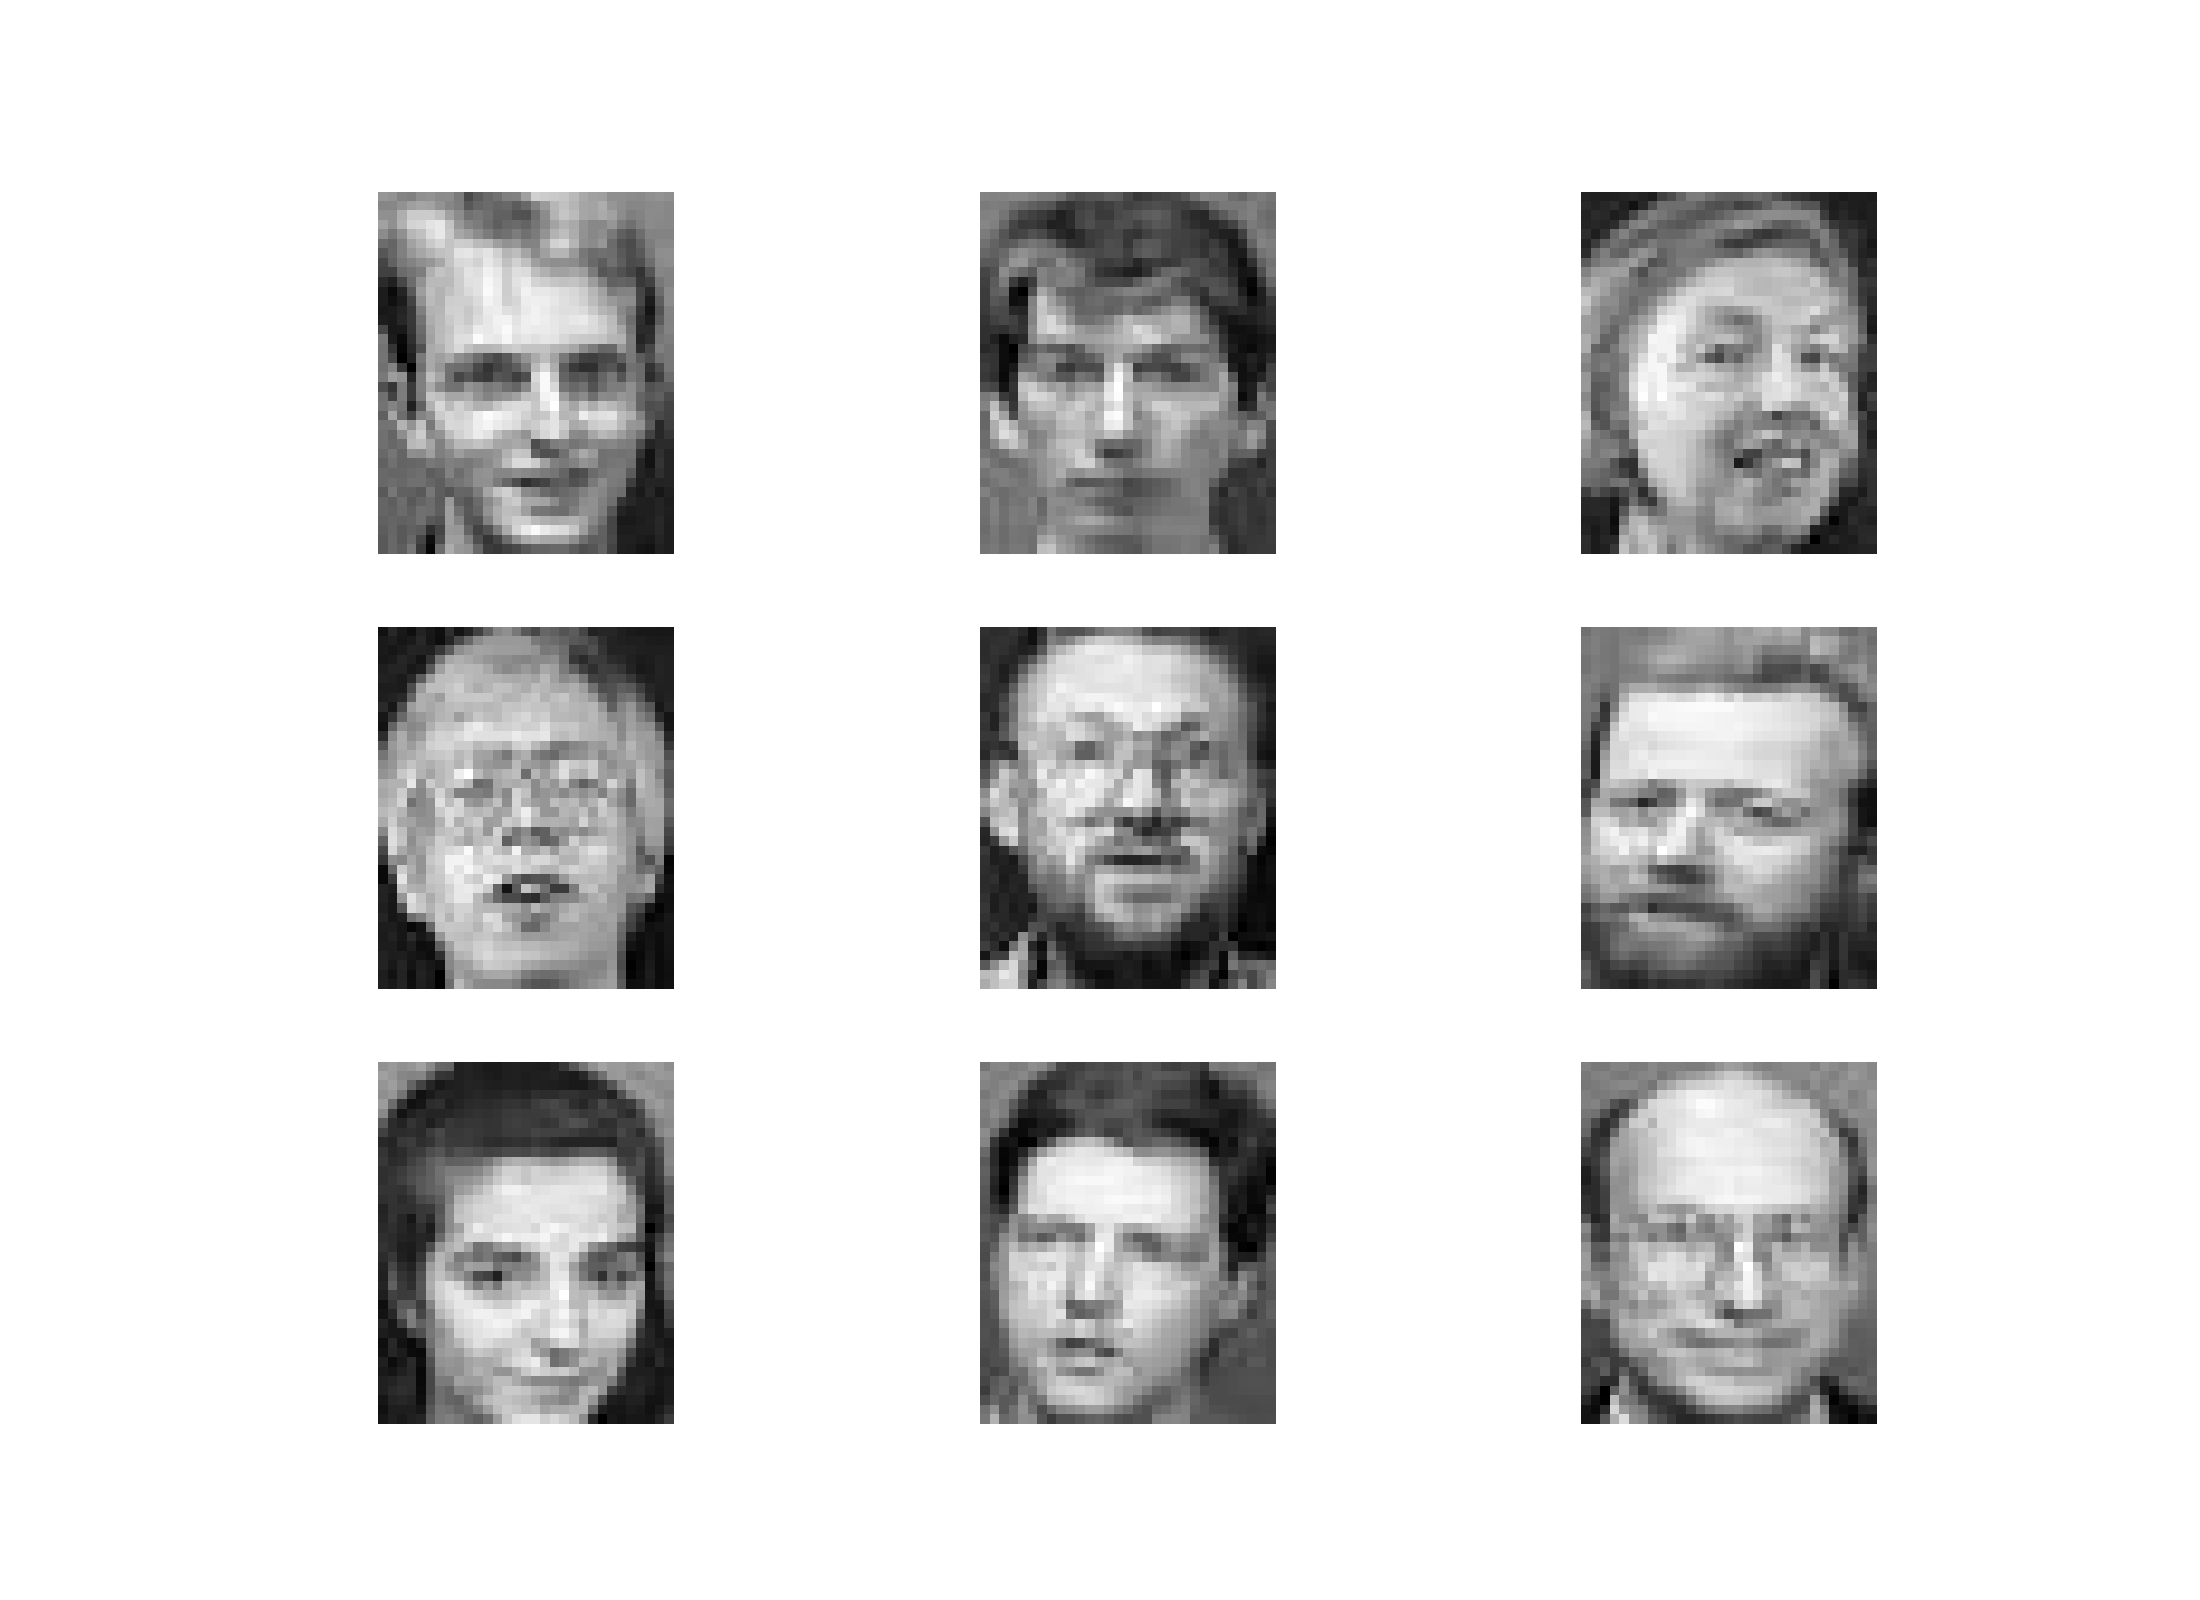

In [4]:
xTr,yTr,xTe,yTe=loaddata("faces.mat")

plt.figure(figsize=(11,8))
plotfaces(xTr[:9, :])


<h2>Implement k-NN for Facial Recognition</h2>
<p>The following four project parts will step you through implementing each function necessary to build your facial recognition system.</p>

<h3>Part 1: Implement <b><code>findknn</code></b> [Graded]</h3>

<p>Implement the function <b><code>findknn</code></b>, which should find the $k$ nearest neighbors of a set of vectors within a given training data set. The call of:</p>
<pre>
 [I,D]=findknn(xTr,xTe,k);
</pre> 
<p>should result in two matrices $I$ and $D$, both of dimensions $k\times n$, where $n$ is the number of input vectors in <code>xTe</code>. The matrix $I(i,j)$ is the index of the $i^{th}$ nearest neighbor of the vector $xTe(j,:)$.</p>
<p>
So, for example, if we set <code>i=I(1,3)</code>, then <code>xTr(i,:)</code> is the first nearest neighbor of vector <code>xTe(3,:)</code>. The second matrix $D$ returns the corresponding distances. So $D(i,j)$ is the distance of $xTe(j,:)$ to its $i^{th}$ nearest neighbor.</p>
<p>You can use the function <code>l2distance</code> from the previous exercise (which is readily available to you.) You may find <code>np.argsort(D,0)</code> and <code>np.sort(D,0)</code> useful when implementing <code>findknn</code>. </p>

In [5]:
def findknn(xTr,xTe,k):
    """
    function [indices,dists]=findknn(xTr,xTe,k);
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """

    ### BEGIN SOLUTION
    D = l2distance(xTr, xTe)
    indices = np.argsort(D, axis=0)
    dists = np.sort(D, axis=0)
    return indices[:k,:], dists[:k,:]
    ### END SOLUTION

In [34]:
xTr = np.random.rand(500,10) # defininng 500 training data points 
xTe = np.random.rand(300,10) # defining 300 testing data points
Ig,Dg = findknn(xTr,xTe,5) # compute indices and distances to the 5- nearest neighbors 
test=(Ig.shape==(5,300)) & (Dg.shape==(5,300))



True

In [36]:
# Run this self-test cell to check your code



def knn_0():
    # checking output types
    xTr = np.random.rand(500,10) # defininng 500 training data points 
    xTe = np.random.rand(300,10) # defining 300 testing data points
    Ig,Dg = findknn(xTr,xTe,5) # compute indices and distances to the 5- nearest neighbors 
    # check if Ig is a matrix of integers, Dg a matrix of floats
    test=(type(Ig)==np.ndarray)  & (type(Ig)==np.ndarray) & ((type(Dg[0][0])==np.float64) or (type(Dg[0][0])==np.float32)) & ((type(Dg[0][0])==np.float64) or (type(Dg[0][0])==np.float32))
    return test


def knn_1():
    # checking output dimensions
    xTr = np.random.rand(500,10) # defininng 500 training data points 
    xTe = np.random.rand(300,10) # defining 300 testing data points
    Ig,Dg = findknn(xTr,xTe,5) # compute indices and distances to the 5- nearest neighbors 
    test=(Ig.shape==(5,300)) & (Dg.shape==(5,300)) # test if output dimensions are correct
    return test


def knn_2():
    # checking 1-NN accuracy
    xTr = np.random.rand(500,10) # defininng 500 training data points 
    xTe = np.random.rand(300,10) # defining 300 testing data points
    Ig,Dg = findknn_grader(xTr,xTe,1) # compute indices and distances to the nearest neighbors with *our* code
    Is,Ds = findknn(xTr,xTe,1) # Use *your* code
    test = np.linalg.norm(Ig - Is) + np.linalg.norm(Dg - Ds) # compare results
    return test<1e-5 

def knn_3():
    # checking 3-NN accuracy
    xTr = np.random.rand(500,10) # defininng 500 training data points 
    xTe = np.random.rand(300,10) # defining 300 testing data points
    Ig,Dg = findknn_grader(xTr,xTe,3) # compute indices and distances to the 3-nearest neighbors with *our* code
    Is,Ds = findknn(xTr,xTe,3) # Use *your* code
    test = np.linalg.norm(Ig - Is) + np.linalg.norm(Dg - Ds) # compare results
    return test<1e-5 


runtest(knn_0,'knn_0')
runtest(knn_1,'knn_1')
runtest(knn_2,'knn_2')
runtest(knn_3,'knn_3')

Running Test: knn_0 ... ✔ Passed!
Running Test: knn_1 ... ✔ Passed!
Running Test: knn_2 ... ✔ Passed!
Running Test: knn_3 ... ✔ Passed!


In [37]:
# Autograder test cell - worth 1 point
# runs knn_1
### BEGIN HIDDEN TESTS
xTr = np.random.rand(500,100)
xTe = np.random.rand(100,100)
Ig,Dg = findknn_grader(xTr,xTe,1)
Is,Ds = findknn(xTr,xTe,1)
test = np.linalg.norm(Ig - Is) + np.linalg.norm(Dg - Ds)
assert test<1e-5 
### END HIDDEN TESTS

In [38]:
# Autograder test cell - worth 1 point
# runs knn_3
### BEGIN HIDDEN TESTS
xTr = np.random.rand(500,100)
xTe = np.random.rand(100,100)
Ig,Dg = findknn_grader(xTr,xTe,3)
Is,Ds = findknn(xTr,xTe,3)
test = np.linalg.norm(Ig - Is) + np.linalg.norm(Dg - Ds)
assert test<1e-5
### END HIDDEN TESTS

<p>The following demo samples random points in 2D. If your <code>findknn</code> function is correctly implemented, you should be able to click anywhere on the plot to add a test point. The function should then draw direct connections from your test point to the k  nearest neighbors. Verify manually if your code is correct.</p>

<IPython.core.display.Javascript object>


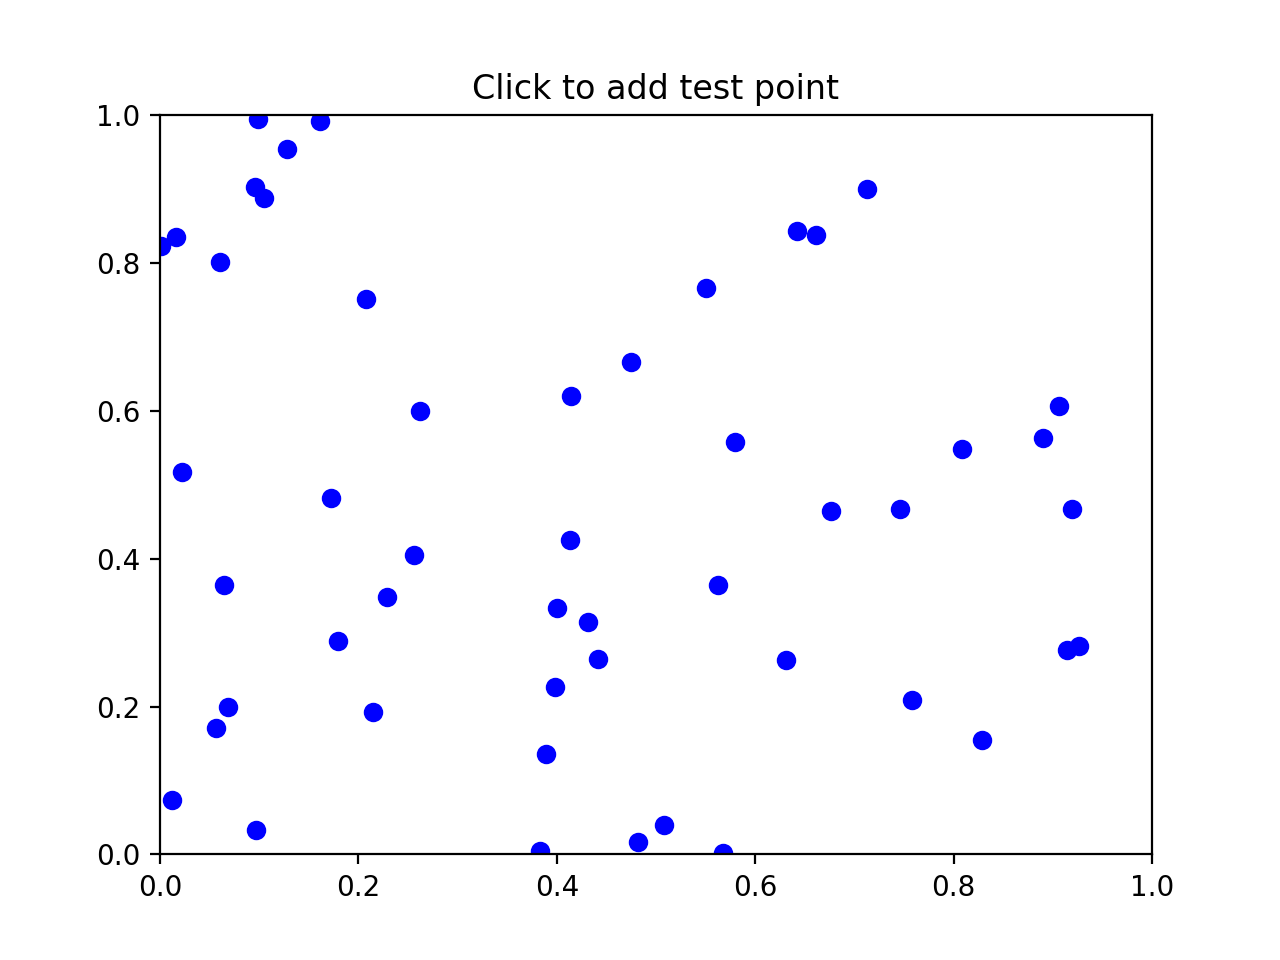

In [39]:
%matplotlib notebook
visualize_knn_2D(findknn)

<p>We can visualize the k=3 nearest training neighbors of some of the test points (Click on the image to cycle through different test points).</p>

<IPython.core.display.Javascript object>


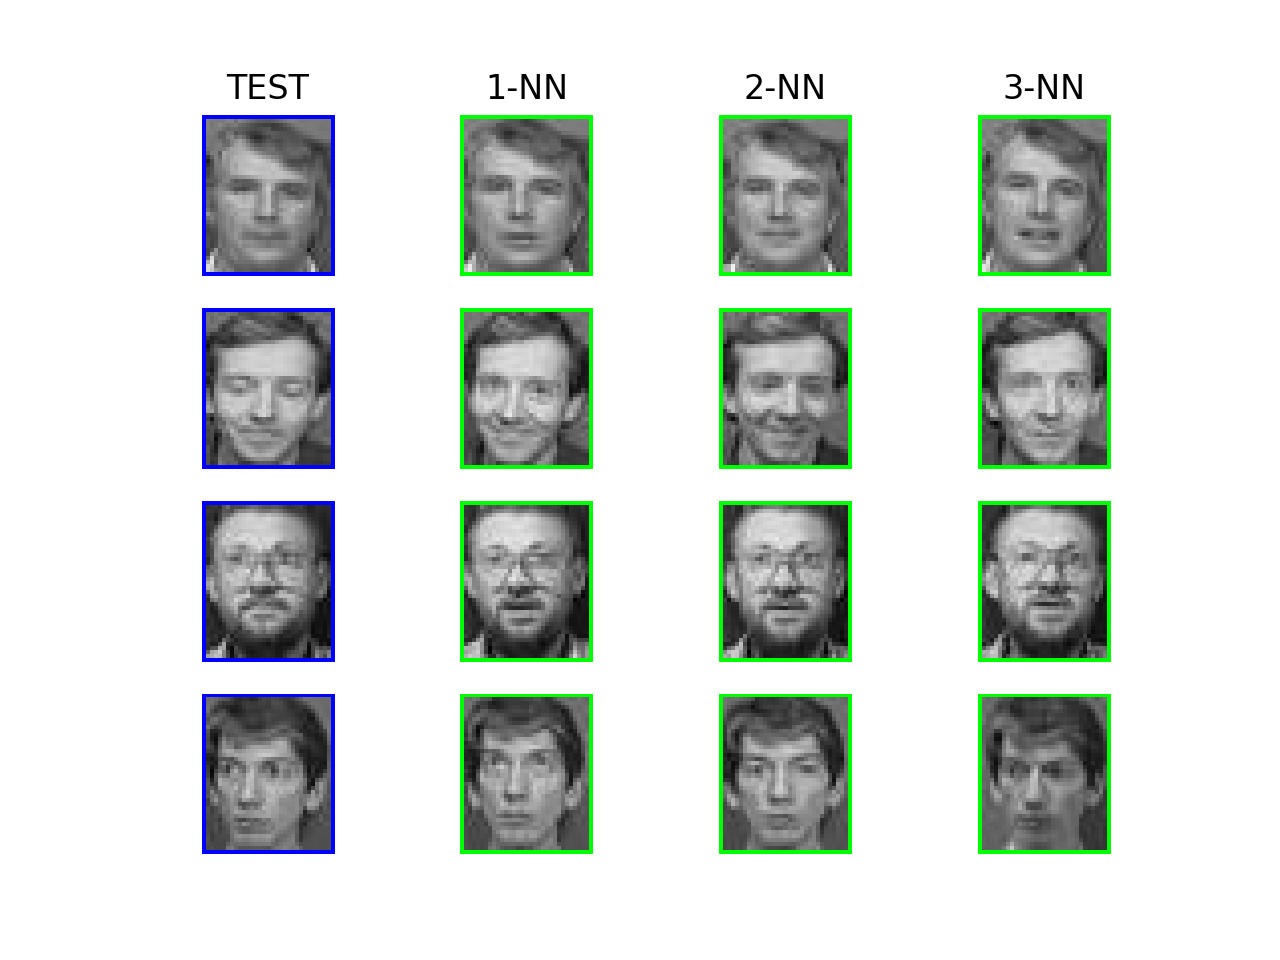

Click on the images above, to cycle through the test images.


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [40]:
%matplotlib notebook
visualize_knn_images(findknn, imageType='faces')

<h3>Part 2: Implement <b><code>accuracy</code></b> [Graded]</h3>

<p>The function <b><code>accuracy</code></b> should compute the accuracy of a classifier. The call of:</p>
<pre>
  result=accuracy(truth,preds);
</pre>
<p>should output the <b>accuracy</b> in variable <code>result</code>. The input variables <code>truth</code> and <code>preds</code> should contain vectors of true and predicted labels respectively.</p>
<p>For example, the call:</p>
<pre>
>> accuracy([1 2 1 2],[1 2 1 1])
</pre>
<p>should return an accuracy of 0.75. Here, the true labels are 1,2,1,2 and the predicted labels are 1,2,1,1. So the first three examples are classified correctly, and the last one is wrong --- 75% accuracy.</p>
<p>You may find the following functions helpful: <code>flatten()</code>, <code>np.mean()</code> and <code>np.abs()</code>.</p>

In [41]:
def accuracy(truth,preds):
    """
    function output=accuracy(truth,preds)         
    Analyzes the accuracy of a prediction against the ground truth
    
    Input:
    truth = n-dimensional vector of true class labels
    preds = n-dimensional vector of predictions
    
    Output:
    accuracy = scalar (percent of predictions that are correct)
    """
    
    truth = truth.flatten()
    preds = preds.flatten()

    ### BEGIN SOLUTION
    if len(truth) == 0 and len(preds) == 0:
        output = 0
        return output
    return np.mean(truth == preds)
    ### END SOLUTION

In [46]:
# Run this self-test cell to check your code

def accuracy_test0():
    # check type of output is correct
    truth = np.array([1, 2, 3, 4])
    preds = np.array([1, 2, 3, 0])
    return type(accuracy(truth,preds))==np.float64



def accuracy_test1():
    # accuracy check on 4 sample data
    truth = np.array([1, 2, 3, 4]) # define truth 
    preds = np.array([1, 2, 3, 0]) # define preds
    return abs(accuracy(truth,preds) - 0.75)<1e-10 # check if accuracy is correct

def accuracy_test2():
    # accuracy check on random samples
    p=np.random.rand(1,1000); # define random string of [0,1] as truth
    truth=np.int16(p>0.5)
    p2=p+np.random.randn(1,1000)*0.1; # define very similar version as preds
    preds=np.int16(p2>0.5)
    return abs(accuracy(truth,preds) - accuracy_grader(truth,preds))<1e-10 # check if accuracy is correct

runtest(accuracy_test0,'accuracy_test0 (types)')
runtest(accuracy_test1,'accuracy_test1 (exactness)')
runtest(accuracy_test2,'accuracy_test2 (exactness)')

Running Test: accuracy_test0 (types) ... ✔ Passed!
Running Test: accuracy_test1 (exactness) ... ✔ Passed!
Running Test: accuracy_test2 (exactness) ... ✔ Passed!


In [ ]:
# Autograder test cell - worth 1 point
# runs accuracy_test1
### BEGIN HIDDEN TESTS
truth = np.array([1, 2, 3, 4])
preds = np.array([1, 2, 3, 0])
assert abs(accuracy(truth,preds) - 0.75)<1e-10
### END HIDDEN TESTS

In [ ]:
# Autograder test cell - worth 1 point
# runs accuracy_test2
### BEGIN HIDDEN TESTS
p=np.random.rand(1,1000);
truth=np.int16(p>0.5)
p2=p+np.random.randn(1,1000)*0.1;
preds=np.int16(p2>0.5)
assert abs(accuracy(truth,preds) - accuracy_grader(truth,preds))<1e-10
### END HIDDEN TESTS

<h3>Part 3: Implement <b><code>knnclassifier</code></b> [Graded]</h3>

<p>Implement the function <b><code>knnclassifier</code></b>, which should perform $k$ nearest neighbor classification on a given test data set. The call:</p>
<pre>preds=knnclassifier(xTr,yTr,xTe,k)</pre>
<p>should output the predictions for the data in <code>xTe</code> i.e. <code>preds[i]</code> will contain the prediction for <code>xTe[i,:]</code>.</p>

<p>You may find it helpful to use <code>flatten()</code> in the implementation of this function. It will also be useful to  refer back to the mode function you implemented in <a href="https://lms.ecornell.com/courses/1451693/modules/items/16187695">Additional NumPy Exercises</a>.</p>

In [ ]:
def knnclassifier(xTr,yTr,xTe,k):
    """
    function preds=knnclassifier(xTr,yTr,xTe,k);
    
    k-nn classifier 
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    # fix array shapes
    yTr = yTr.flatten()

    ### BEGIN SOLUTION
    inds, _ = findknn_grader(xTr, xTe, k)
    m, d = xTe.shape
    vs = yTr[inds]
    preds = np.array([mode(vs[:,i])[0] for i in range(m)]).flatten()
    return preds
    ### END SOLUTION

In [ ]:
# Run this self-test cell to check your code

def knn_classifier_test1():
    X = np.array([[1,0,0,1],[0,1,0,1]]).T
    y = np.array([1,1,2,2])
    np.testing.assert_allclose(knnclassifier(X,y,X,1),y)
    return np.testing.assert_allclose

def knn_classifier_test2():
    X = np.array([[1,0,0,1],[0,1,0,1]]).T
    y = np.array([1,1,2,2])
    y2 = np.array([2,2,1,1])
    return np.array_equal(knnclassifier(X,y,X,3),y2)

def knn_classifier_test3():
    X = np.array([[-4,-3,-2,2,3,4]]).T
    y = np.array([1,1,1,2,2,2])
    X2 = np.array([[-1,1]]).T
    y2 = np.array([1,2])
    return np.array_equal(knnclassifier(X,y,X2,2),y2)

def knn_classifier_test4():
    X = np.array([[-4,-3,-2,2,3,4]]).T
    y = np.array([1,1,1,2,2,2])
    X2 = np.array([[0,1]]).T
    y2 = np.array([1,2])
    y3 = np.array([2,2])
    return np.array_equal(knnclassifier(X,y,X2,2),y2) or np.array_equal(knnclassifier(X,y,X2,2),y3)

def knn_classifier_test5():
    X = np.random.rand(4,4)
    y = np.array([1,2,2,2])
    return accuracy(knnclassifier(X,y,X,1),y) == 1

def knn_classifier_test6():
    X = np.random.rand(4,4)
    y = np.array([1,2,1,2])
    return accuracy(knnclassifier(X,y,X,1),y) == 1

def knn_classifier_test7():
    X = np.random.rand(10,100)
    y = np.round(np.random.rand(10)).astype('int')
    return accuracy(knnclassifier(X,y,X,1),y) == 1

runtest(knn_classifier_test1,'knn_classifier_test1')
runtest(knn_classifier_test2,'knn_classifier_test2')
runtest(knn_classifier_test3,'knn_classifier_test3')
runtest(knn_classifier_test4,'knn_classifier_test4')
runtest(knn_classifier_test5,'knn_classifier_test5')
runtest(knn_classifier_test6,'knn_classifier_test6')
runtest(knn_classifier_test7,'knn_classifier_test7')

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test1
### BEGIN HIDDEN TESTS
X = np.array([[1,0,0,1],[0,1,0,1]]).T
y = np.array([1,1,2,2])
np.testing.assert_allclose(knnclassifier(X,y,X,1),y)
assert np.testing.assert_allclose
### END HIDDEN TESTS

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test2
### BEGIN HIDDEN TESTS
X = np.array([[1,0,0,1],[0,1,0,1]]).T
y = np.array([1,1,2,2])
y2 = np.array([2,2,1,1])
assert np.array_equal(knnclassifier(X,y,X,3),y2)
### END HIDDEN TESTS

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test3
### BEGIN HIDDEN TESTS
X = np.array([[-4,-3,-2,2,3,4]]).T
y = np.array([1,1,1,2,2,2])
X2 = np.array([[-1,1]]).T
y2 = np.array([1,2])
assert np.array_equal(knnclassifier(X,y,X2,2),y2)
### END HIDDEN TESTS

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test4
### BEGIN HIDDEN TESTS
X = np.array([[-4,-3,-2,2,3,4]]).T
y = np.array([1,1,1,2,2,2])
X2 = np.array([[0,1]]).T
y2 = np.array([1,2])
y3 = np.array([2,2])
assert np.array_equal(knnclassifier(X,y,X2,2),y2) or np.array_equal(knnclassifier(X,y,X2,2),y3)
### END HIDDEN TESTS

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test5
### BEGIN HIDDEN TESTS
X = np.random.rand(4,4)
y = np.array([1,2,2,2])
assert accuracy(knnclassifier(X,y,X,1),y) == 1
### END HIDDEN TESTS

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test6
### BEGIN HIDDEN TESTS
X = np.random.rand(4,4)
y = np.array([1,2,1,2])
assert accuracy(knnclassifier(X,y,X,1),y) == 1
### END HIDDEN TESTS

In [ ]:
# Autograder test cell - worth 1 point
# runs knn_classifier_test7
### BEGIN HIDDEN TESTS
X = np.random.rand(10,100)
y = np.round(np.random.rand(10)).astype('int')
assert accuracy(knnclassifier(X,y,X,1),y) == 1
### END HIDDEN TESTS

<p>You can compute the actual classification error on the test set by calling</p>
<pre>
>> accuracy(yTe,knnclassifier(xTr,yTr,xTe,3))
</pre>

<h3><b>Part 4: Calculate Accuracy</b></h3>

<p>The following script runs your $k$-nearest neighbor classifier over the faces and digits data set. The faces data set has $40$ classes and the digits data set has $10$. What classification accuracy would you expect from a random classifier?</p>

In [ ]:
print("Face Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata("faces.mat") # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=accuracy(yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

<h3>k-NN Boundary Visualization</h3>

<p>To help give you a visual understanding of how the k-NN boundary is affected by $k$ and the specific dataset, feel free to play around with the visualization below.</p>
<h4>Instructions:</h4>
<ol>
    <li>Run the cell below.</li>
    <li>Click anywhere in the graph to add a negative class point.</li>
    <li>Hold down <b>'p'</b> key and click anywhere in the graph to add a positive class point.</li>
    <li>To increase $k$, hold down <b>'h'</b> key and click anywhere in the graph.</li>
</ol>

In [ ]:
%matplotlib notebook
visualize_knn_boundary(knnclassifier)